<a href="https://colab.research.google.com/github/anubhavgupta1/Udacity/blob/main/StudentAdmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


!mkdir -p drive
!google-drive-ocamlfuse drive

import os
os.chdir("drive/Udacity/Dataset/")
!ls

sample_data
E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144865 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.23-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import  train_test_split

#**Loading The Data**

In [22]:
student = pd.read_csv('student_data.csv')
type(student)

pandas.core.frame.DataFrame

In [23]:
student.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [24]:
student.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [25]:
student['rank'].value_counts()

2    151
3    121
4     67
1     61
Name: rank, dtype: int64

In [ ]:
# Make dummy variables for rank
student = pd.concat([student, pd.get_dummies(student['rank'], prefix='rank')], axis=1)

# Drop the previous rank column
student = student.drop('rank', axis=1)

In [28]:
# Print the first 5 rows of our data
student.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


In [29]:
student.shape

(400, 7)

In [30]:
X = student[student.columns.difference(['admit'])]
Y = student['admit']

#**Train Test Split**

In [31]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1,stratify=Y,random_state=1)
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(400, 6) (360, 6) (40, 6)
(400,) (360,) (40,)


# Perceptron Class

In [32]:
X_train = X_train.values
X_test = X_test.values

$y = 1, \mbox{if} \sum_i w_i x_i >= b$

$y =  0, \mbox{otherwise}$

In [33]:
class Perceptron:
  
  def __init__ (self):
    self.w = None
    self.b = None
    
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
    
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, epochs = 1,lr = 1):
    
    self.w = np.ones(X.shape[1])
    self.b = 0
    
    chkptw = np.ones(X.shape[1])
    chkptb = 0
    
    accuracy = {}
    
    max_accuracy = 0
    max_accuracy_epoch = 0
    
    weights_matrix = []
    bias_matrix = []
    
    for epoch in range(epochs):
      
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w +  lr * x
          self.b = self.b +  lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w -  lr * x
          self.b = self.b -  lr * 1
      
      weights_matrix.append(self.w)
      bias_matrix.append(self.b)
      
      accuracy[epoch] = accuracy_score(self.predict(X),Y)
      
      if(accuracy[epoch] > max_accuracy):
        max_accuracy = accuracy[epoch]
        max_accuracy_epoch = epoch
        chkptw = self.w
        chkptb = self.b
    
    self.w = chkptw
    self.b = chkptb
    
    print("Max accuraracy is : ",max_accuracy, " achieved in epoch : ",max_accuracy_epoch)
    
    plt.plot(np.array(list(accuracy.values())).astype(float))
    plt.ylim([0, 1])
    plt.show()
    
    return np.array(weights_matrix), np.array(bias_matrix)

Max accuraracy is :  0.6833333333333333  achieved in epoch :  0


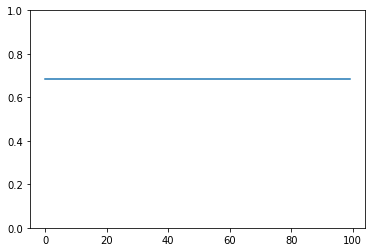

In [34]:
perceptron = Perceptron()
weights , bias = perceptron.fit(X_train,Y_train,100,1)

Max accuraracy is :  0.6833333333333333  achieved in epoch :  1


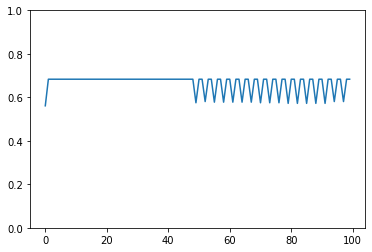

In [35]:
perceptron = Perceptron()
weights , bias = perceptron.fit(X_train,Y_train,100,0.0001)

Max accuraracy is :  0.6833333333333333  achieved in epoch :  1


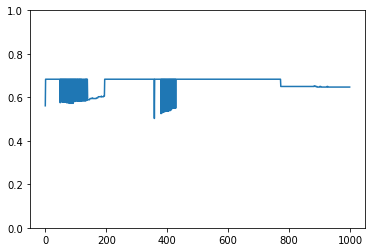

In [36]:
perceptron = Perceptron()
weights , bias = perceptron.fit(X_train,Y_train,1000,0.0001)

Max accuraracy is :  0.7027777777777777  achieved in epoch :  2588


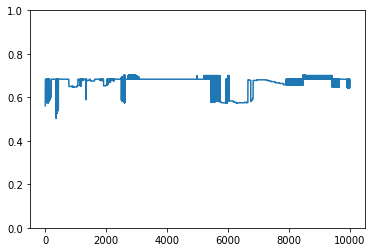

In [40]:
perceptron = Perceptron()
weights , bias = perceptron.fit(X_train,Y_train,10000,0.0001)

In [41]:
Y_pred_train = perceptron.predict(X_train)
Y_pred_test = perceptron.predict(X_test)
print("Training accuracy is : ",accuracy_score(Y_train,Y_pred_train))
print("Test accuracy is : ",accuracy_score(Y_test,Y_pred_test))

Training accuracy is :  0.7027777777777777
Test accuracy is :  0.65


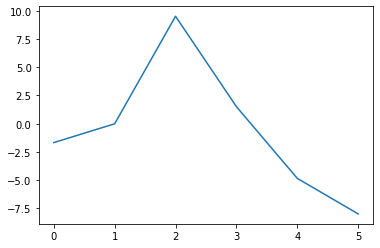

In [42]:
plt.plot(weights[-1,:])
plt.show()

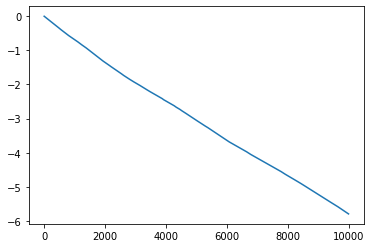

In [43]:
plt.plot(bias)
plt.show()